In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Interpolation

In [20]:
# Step 1: Generate sample points
np.random.seed(42)
x = np.sort(np.random.rand(20) * 10)      # 10 random x points between 0 and 10
y = np.sin(x) + np.random.normal(0, 0.1, len(x))  # noisy sin curve

In [21]:
# Step 2: Create a fine grid within data range
x_fine = np.linspace(x.min(), x.max(), 400)

In [22]:
# Step 3: Apply different interpolation methods
# Linear interpolation
linear_interp = interpolate.interp1d(x, y, kind='linear')

# Cubic spline interpolation
cubic_interp = interpolate.interp1d(x, y, kind='cubic')

# Polynomial interpolation (degree = len(x)-1)
poly_coeffs = np.polyfit(x, y, deg=len(x)-1)
poly_interp = np.poly1d(poly_coeffs)

# Radial Basis Function interpolation
rbf_interp = interpolate.Rbf(x, y, function='multiquadric', smooth=0.2)

/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_2525/1186127966.py:9: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(x, y, deg=len(x)-1)


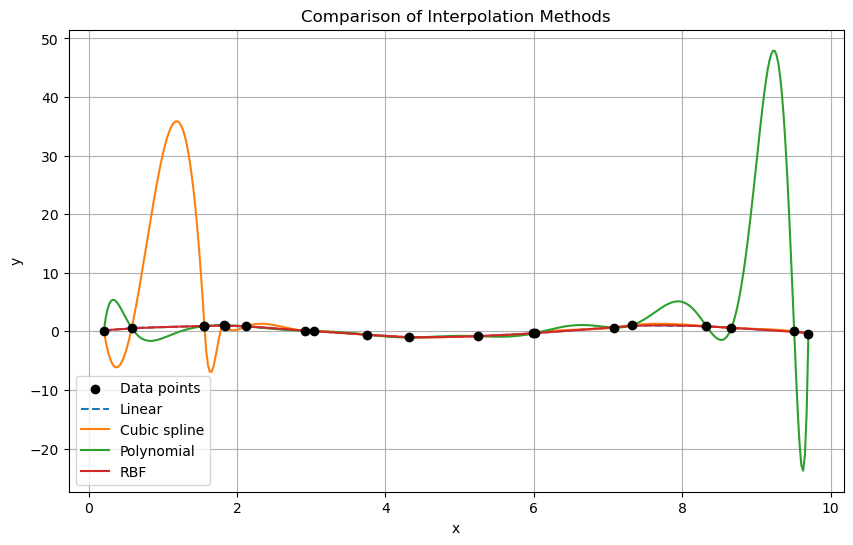

In [23]:
# Step 4: Plot everything
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='black', label='Data points', zorder=5)
plt.plot(x_fine, linear_interp(x_fine), '--', label='Linear')
plt.plot(x_fine, cubic_interp(x_fine), label='Cubic spline')
plt.plot(x_fine, poly_interp(x_fine), label='Polynomial')
plt.plot(x_fine, rbf_interp(x_fine), label='RBF')

plt.title("Comparison of Interpolation Methods")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Simulation of basis functions

## B-Splines functions

In [27]:
from scipy.interpolate import BSpline

In [42]:
# Step 1: Define knots and degree
degree = 3  # cubic B-spline
n_basis = 8
knots = np.linspace(-1, 1, n_basis + degree + 1)

In [43]:
# Step 2: Grid for plotting
x = np.linspace(-1, 1, 500)

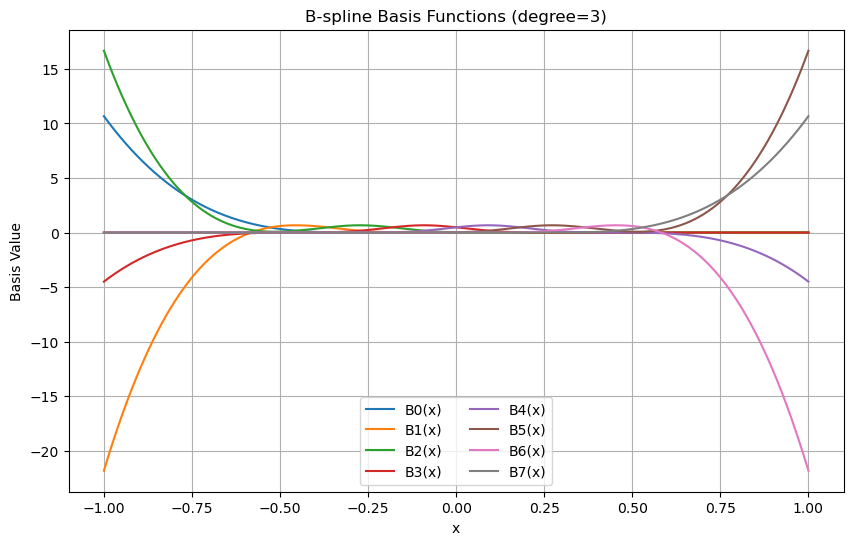

In [44]:
# Step 3: Plot each basis function
plt.figure(figsize=(10,6))
for i in range(n_basis):
    coeffs = np.zeros(n_basis)
    coeffs[i] = 1.0  # 1 for this basis, 0 for others
    spline = BSpline(knots, coeffs, degree)
    plt.plot(x, spline(x), label=f'B{i}(x)')

plt.title(f'B-spline Basis Functions (degree={degree})')
plt.xlabel('x')
plt.ylabel('Basis Value')
plt.legend(ncol=2)
plt.grid(True)
plt.show()

## Fourrier Basis functions

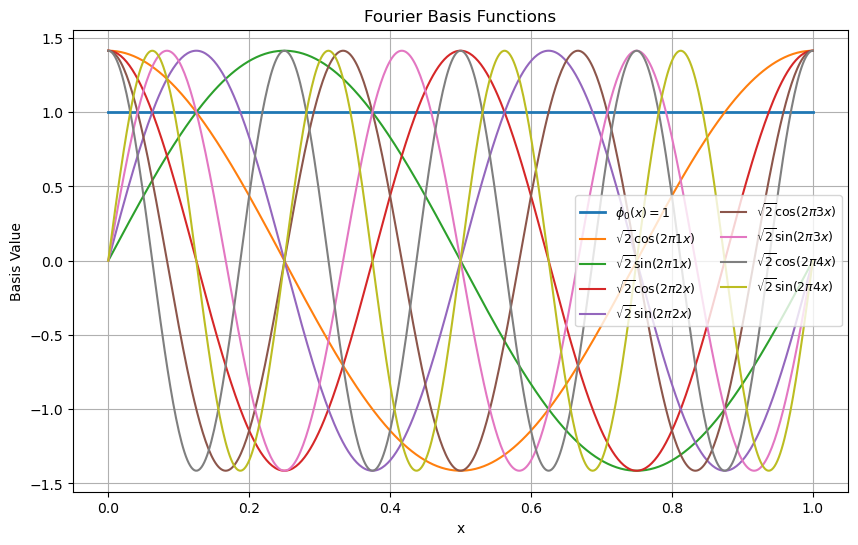

In [30]:
# Step 1: Define the domain
x = np.linspace(0, 1, 500)

# Step 2: Define how many frequencies (basis functions) to show
n_freq = 4  # Number of frequency components

# Step 3: Generate and plot Fourier basis functions
plt.figure(figsize=(10,6))
plt.plot(x, np.ones_like(x), label=r'$\phi_0(x) = 1$', lw=2)

for k in range(1, n_freq + 1):
    plt.plot(x, np.sqrt(2) * np.cos(2 * np.pi * k * x), label=rf'$\sqrt{{2}}\cos(2\pi {k}x)$')
    plt.plot(x, np.sqrt(2) * np.sin(2 * np.pi * k * x), label=rf'$\sqrt{{2}}\sin(2\pi {k}x)$')

plt.title("Fourier Basis Functions")
plt.xlabel("x")
plt.ylabel("Basis Value")
plt.legend(ncol=2, fontsize=9)
plt.grid(True)
plt.show()

## Polynomials

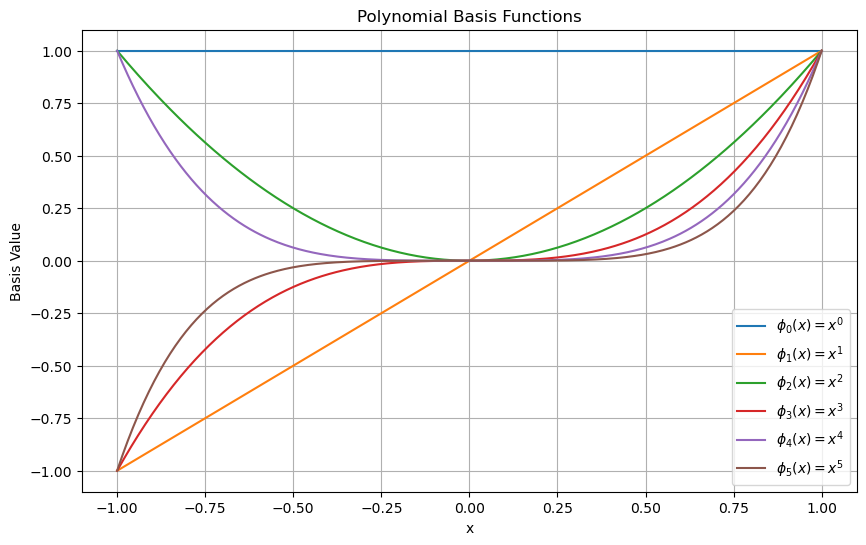

In [31]:
# Step 1: Define the domain
x = np.linspace(-1, 1, 400)

# Step 2: Define the degree of the polynomial basis
degree = 5

# Step 3: Plot the polynomial basis functions
plt.figure(figsize=(10,6))

for i in range(degree + 1):
    plt.plot(x, x**i, label=rf'$\phi_{i}(x) = x^{i}$')

plt.title("Polynomial Basis Functions")
plt.xlabel("x")
plt.ylabel("Basis Value")
plt.legend()
plt.grid(True)
plt.show()

## Wavelets

In [32]:
import pywt

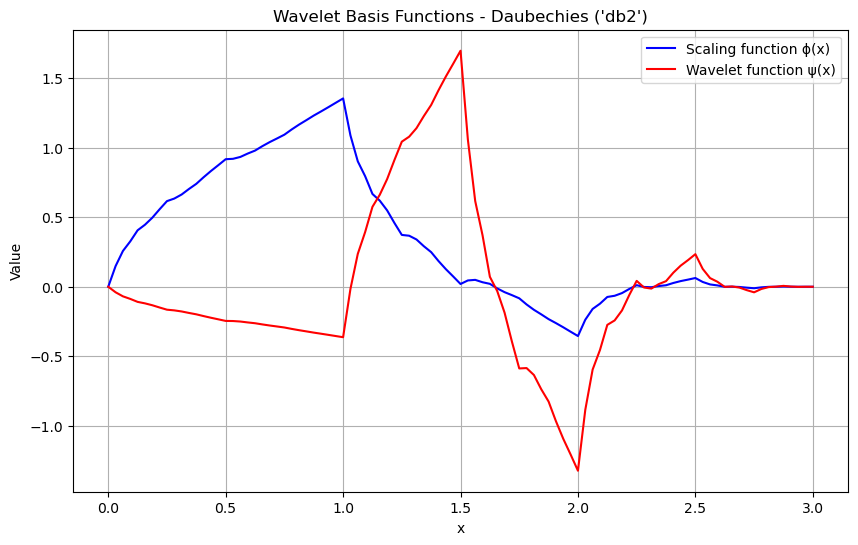

In [33]:
# Step 1: Choose a wavelet
wavelet = pywt.Wavelet('db2')  # Daubechies 2 (you can try 'haar', 'db4', etc.)

# Step 2: Get wavelet function data
phi, psi, x = wavelet.wavefun(level=5)  # scaling (phi) and wavelet (psi)

# Step 3: Plot the wavelet and scaling functions
plt.figure(figsize=(10,6))

plt.plot(x, phi, label='Scaling function ϕ(x)', color='blue')
plt.plot(x, psi, label='Wavelet function ψ(x)', color='red')

plt.title(f"Wavelet Basis Functions - {wavelet.family_name} ('{wavelet.name}')")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

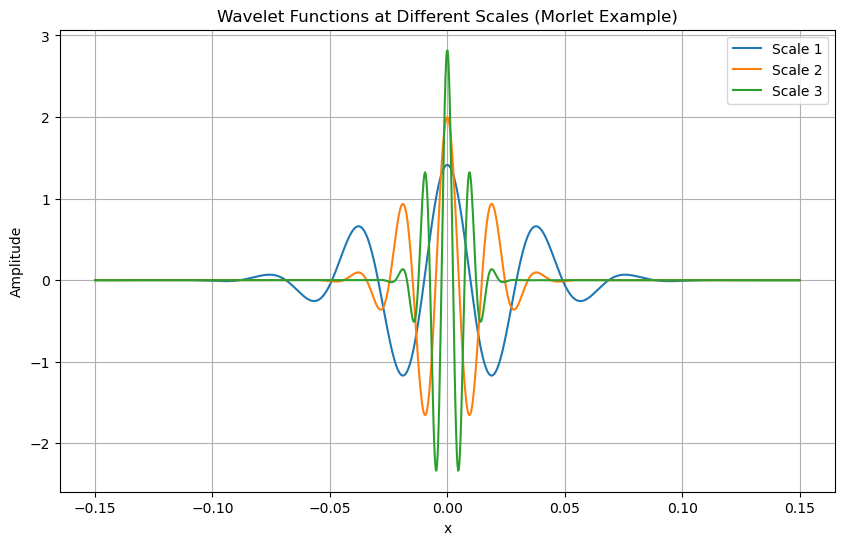

In [ ]:
plt.figure(figsize=(10,6))
x = np.linspace(-0.15, .15, 1000)
psi = pywt.ContinuousWavelet('morl').wavefun(length=len(x))[0]

for j in range(1, 4):
    plt.plot(x, 2**(j/2) * np.interp(2**j * x, np.linspace(-0.5,0.5,len(psi)), psi), label=f'Scale {j}')

plt.title("Wavelet Functions at Different Scales (Morlet Example)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Approximation of the BM 

## Using B-Splines basis

In [46]:
# Simulate Brownian Motion
np.random.seed(0)
n = 500
t = np.linspace(0, 1, n)
dt = t[1] - t[0]
increments = np.sqrt(dt) * np.random.randn(n - 1)
W = np.zeros(n)
W[1:] = np.cumsum(increments)

In [ ]:
# Build a B-Splines basis
degree = 3          # cubic B-splines
n_basis = 200        # number of basis functions

# Uniform open knot vector (clamped at boundaries)
internal_knots = np.linspace(0, 1, n_basis - degree + 1)
knots = np.concatenate(([0]*degree, internal_knots, [1]*degree))

In [74]:
# Build design matrix (each column is one basis function)
A = np.zeros((n, n_basis))
for i in range(n_basis):
    coeffs = np.zeros(n_basis)
    coeffs[i] = 1
    spline = BSpline(knots, coeffs, degree)
    A[:, i] = spline(t)

In [75]:
# Least-squares fit: find coefficients minimizing ||A c - W||²
c_hat, *_ = np.linalg.lstsq(A, W, rcond=None)
W_approx = A @ c_hat


In [76]:
# Compute residuals and MSE
residual = W - W_approx
mse = np.mean(residual**2)

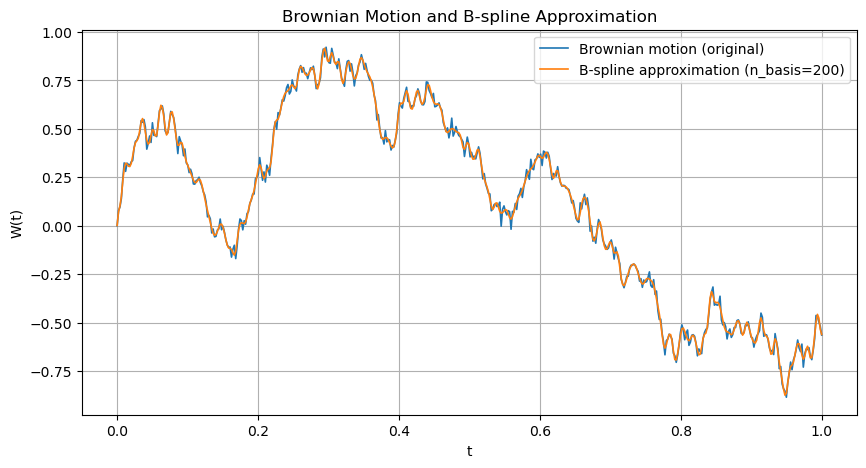

In [77]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(t, W, label='Brownian motion (original)', lw=1.2)
plt.plot(t, W_approx, label=f'B-spline approximation (n_basis={n_basis})', lw=1.2)
plt.title('Brownian Motion and B-spline Approximation')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.legend()
plt.grid(True)
plt.show()

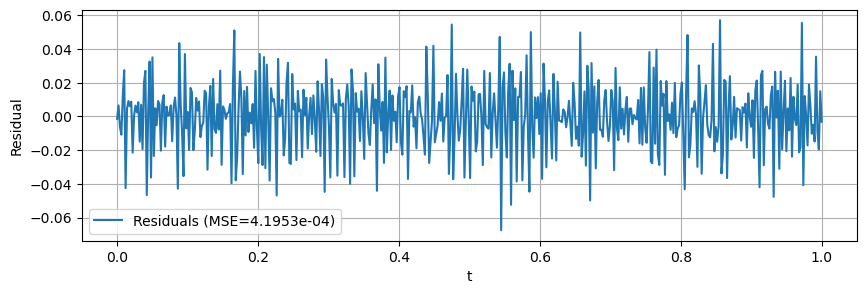

In [78]:
plt.figure(figsize=(10,3))
plt.plot(t, residual, label=f'Residuals (MSE={mse:.4e})')
plt.xlabel('t')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

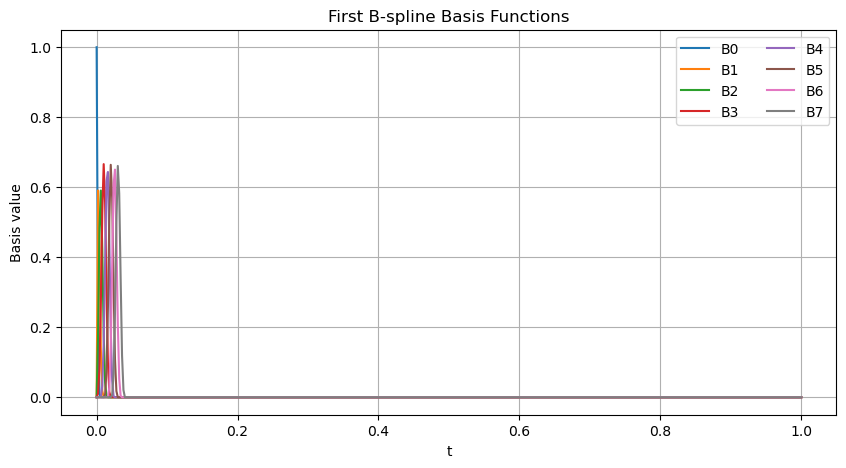

In [79]:
# Show first few B-Splines functions
plt.figure(figsize=(10,5))
for i in range(min(8, n_basis)):
    plt.plot(t, A[:, i], label=f'B{i}')
plt.title('First B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('Basis value')
plt.legend(ncol=2)
plt.grid(True)
plt.show()

In [80]:
print(f"Mean Squared Error: {mse:.4e}")

Mean Squared Error: 4.1953e-04


## Fourier Basis

In [81]:
# Simulate Brownian Motion
np.random.seed(0)
n = 500
t = np.linspace(0, 1, n)
dt = t[1] - t[0]
increments = np.sqrt(dt) * np.random.randn(n - 1)
W = np.zeros(n)
W[1:] = np.cumsum(increments)

In [92]:
# Build Fourier Basis Matrix
def fourier_basis(t, n_freq):
    """Generate Fourier basis matrix with n_freq frequency components."""
    t = np.asarray(t)
    n = len(t)
    A = [np.ones(n)]  # constant term φ₀(x) = 1
    for k in range(1, n_freq + 1):
        A.append(np.sqrt(2) * np.cos(2 * np.pi * k * t))
        A.append(np.sqrt(2) * np.sin(2 * np.pi * k * t))
    return np.column_stack(A)

n_freq = 50  # number of frequency components (controls complexity)
A = fourier_basis(t, n_freq)
n_basis = A.shape[1]

In [93]:
# Least Square coefficient minimizing
c_hat, *_ = np.linalg.lstsq(A, W, rcond=None)
W_approx = A @ c_hat

In [94]:
# Compute residuals and RMSE
residual = W - W_approx
mse = np.mean(residual**2)

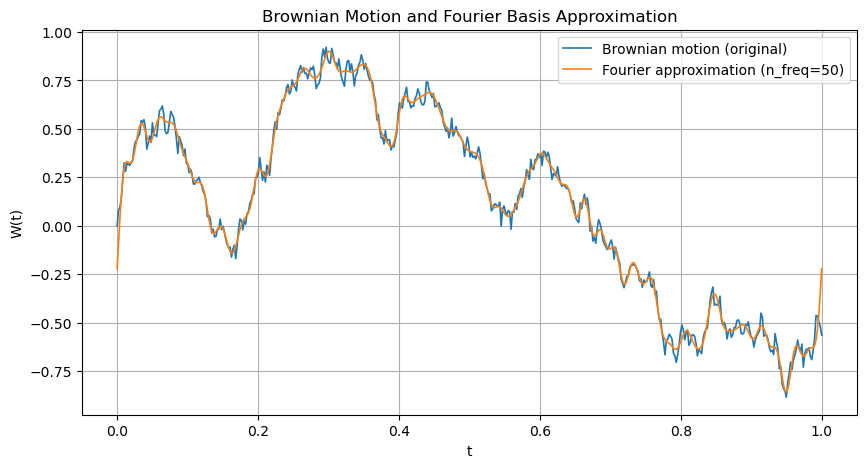

In [95]:
#Plot the results
plt.figure(figsize=(10,5))
plt.plot(t, W, label='Brownian motion (original)', lw=1.2)
plt.plot(t, W_approx, label=f'Fourier approximation (n_freq={n_freq})', lw=1.2)
plt.title('Brownian Motion and Fourier Basis Approximation')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.legend()
plt.grid(True)
plt.show()

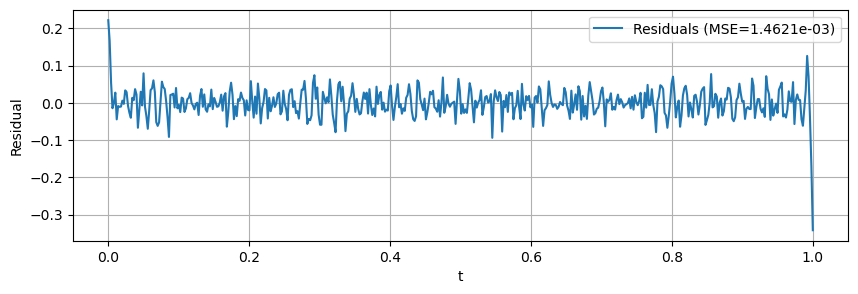

In [96]:
# Residuals
plt.figure(figsize=(10,3))
plt.plot(t, residual, label=f'Residuals (MSE={mse:.4e})')
plt.xlabel('t')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

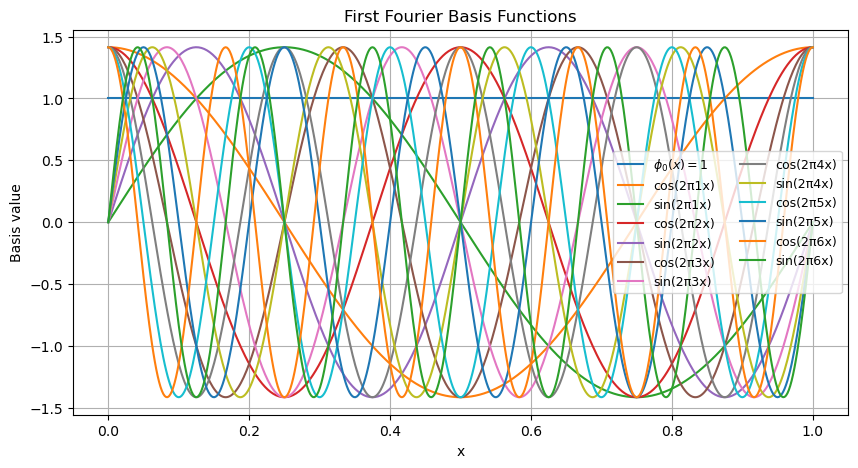

In [97]:
# Plot first fourier basis functions
plt.figure(figsize=(10,5))
num_to_show = min(6, n_freq)
x = np.linspace(0, 1, 500)
plt.plot(x, np.ones_like(x), label=r'$\phi_0(x)=1$')
for k in range(1, num_to_show + 1):
    plt.plot(x, np.sqrt(2)*np.cos(2*np.pi*k*x), label=rf'cos(2π{k}x)')
    plt.plot(x, np.sqrt(2)*np.sin(2*np.pi*k*x), label=rf'sin(2π{k}x)')
plt.title('First Fourier Basis Functions')
plt.xlabel('x')
plt.ylabel('Basis value')
plt.legend(ncol=2, fontsize=9)
plt.grid(True)
plt.show()

In [98]:
print(f"Mean Squared Error: {mse:.4e}")

Mean Squared Error: 1.4621e-03


# PCA 2D

In [99]:
from sklearn.decomposition import PCA

In [101]:
# Simulate 2D correlated assets
np.random.seed(42)
n_samples = 300

# True covariance structure
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # correlated Gaussian

X = np.random.multivariate_normal(mean, cov, n_samples)

In [102]:
# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)  # projected data (for possible later use)

In [103]:
# Extract PCA parameters
mean_ = pca.mean_
components_ = pca.components_
explained_variance_ = pca.explained_variance_

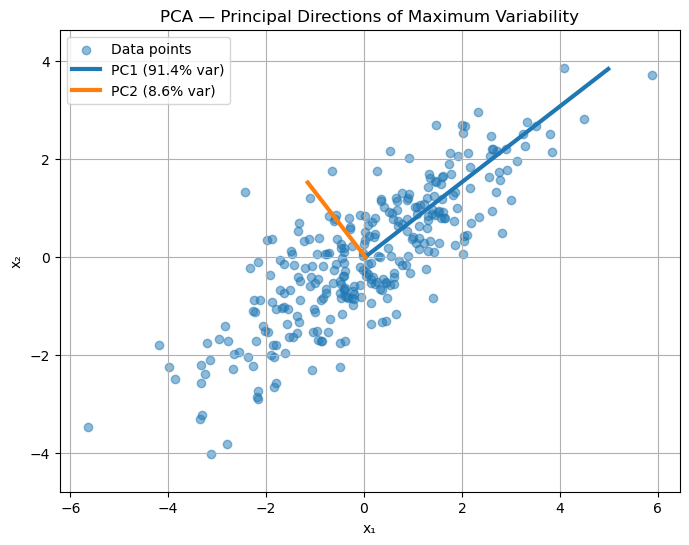

In [106]:
# Plot results 
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data points')

# Plot principal component vectors
for i, (comp, var) in enumerate(zip(components_, explained_variance_)):
    # Scale eigenvectors by sqrt of variance for visual clarity
    vector = comp * np.sqrt(var) * 3
    plt.plot([mean_[0], mean_[0] + vector[0]], 
             [mean_[1], mean_[1] + vector[1]], 
             lw=3, label=f'PC{i+1} ({pca.explained_variance_ratio_[i]*100:.1f}% var)')

plt.title("PCA — Principal Directions of Maximum Variability")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Intraday return eigenfunctions

In [111]:
from scipy.linalg import svd
from scipy.stats import norm

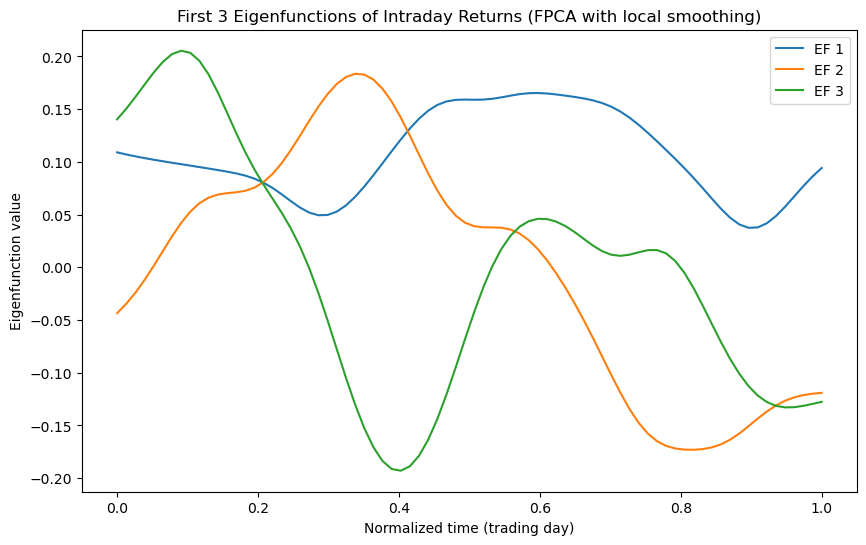

In [112]:
# 1. Simuler des retours intraday
np.random.seed(42)
n_days = 100
n_intraday = 78
times = np.linspace(0, 1, n_intraday)

def simulate_intraday_return_pattern(t):
    return 0.001 * np.sin(2 * np.pi * t * 2)

returns = np.array([
    simulate_intraday_return_pattern(times) + 0.01 * np.random.randn(n_intraday)
    for _ in range(n_days)
])

# 2. Lissage local (Nadaraya-Watson)
def nadaraya_watson_smoother(data, bandwidth=0.05):
    n_samples, n_points = data.shape
    smoothed = np.zeros_like(data)
    for i in range(n_points):
        weights = norm.pdf(times - times[i], scale=bandwidth)
        weights /= weights.sum()
        smoothed[:, i] = data @ weights
    return smoothed

returns_smooth = nadaraya_watson_smoother(returns)

# 3. FPCA via SVD
# Centrer les données
returns_centered = returns_smooth - returns_smooth.mean(axis=0)

U, S, Vt = svd(returns_centered, full_matrices=False)
# Vt contient les eigenfunctions
eigenfunctions = Vt[:3]  # 3 premières

# 4. Tracer les 3 premières eigenfunctions
plt.figure(figsize=(10, 6))
for i, ef in enumerate(eigenfunctions):
    plt.plot(times, ef, label=f'EF {i+1}')
plt.xlabel("Normalized time (trading day)")
plt.ylabel("Eigenfunction value")
plt.title("First 3 Eigenfunctions of Intraday Returns (FPCA with local smoothing)")
plt.legend()
plt.show()

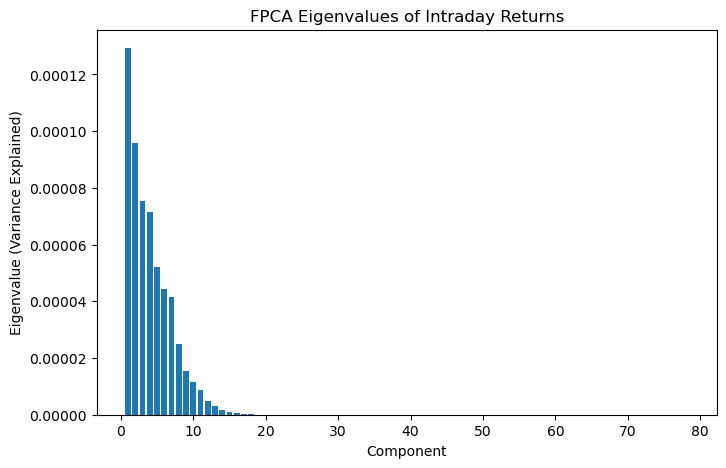

In [113]:
eigenvalues = (S**2) / (n_days - 1)  # variance explained by each component

# 5. Plot eigenvalues
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues)+1), eigenvalues)
plt.xlabel("Component")
plt.ylabel("Eigenvalue (Variance Explained)")
plt.title("FPCA Eigenvalues of Intraday Returns")
plt.show()

# Volatility Surface with FAR(1) model

In [132]:
from mpl_toolkits.mplot3d import Axes3D 

In [171]:
# ---------- 1. Simulate intraday returns for multiple stocks ----------
np.random.seed(42)
n_days = 50
n_intraday = 78   # 5-min intervals
n_stocks = 5
times = np.linspace(0, 1, n_intraday)

In [172]:
# Simulate independent Brownian motion for each stock
returns = np.random.randn(n_days, n_stocks, n_intraday) * 0.01

In [173]:
# ---------- 2. Compute cumulative returns (for FPCA/FAR) ----------
cum_returns = np.cumsum(returns, axis=2)

In [174]:
# ---------- 3. Functional PCA for dimensionality reduction ----------
# Flatten days x stocks into "observations" x "time" matrix for SVD
X = cum_returns.reshape(n_days * n_stocks, n_intraday)
X_centered = X - X.mean(axis=0)
U, S, Vt = svd(X_centered, full_matrices=False)

# Take first K eigenfunctions
K = 5
eigenfunctions = Vt[:K]
scores = X_centered @ Vt[:K].T  # projection on eigenfunctions

In [175]:
# ---------- 4. Fit a simple FAR(1) model on FPCA scores ----------
# Here we fit: score_t ~ score_{t-1} (multivariate AR(1))
scores_t = scores[1:]       # all but first
scores_t_minus_1 = scores[:-1]
# Estimate FAR coefficients via least squares
A = np.linalg.lstsq(scores_t_minus_1, scores_t, rcond=None)[0]

# Forecasted scores (optional)
scores_forecast = scores_t_minus_1 @ A
# Reconstruct curves from forecasted scores
reconstructed = scores_forecast @ Vt[:K] + X.mean(axis=0)

In [176]:
# ---------- 5. Compute intraday volatility surface ----------
# daily volatility per stock per intraday time
vol_surface = returns.std(axis=0)  # shape: n_stocks x n_intraday

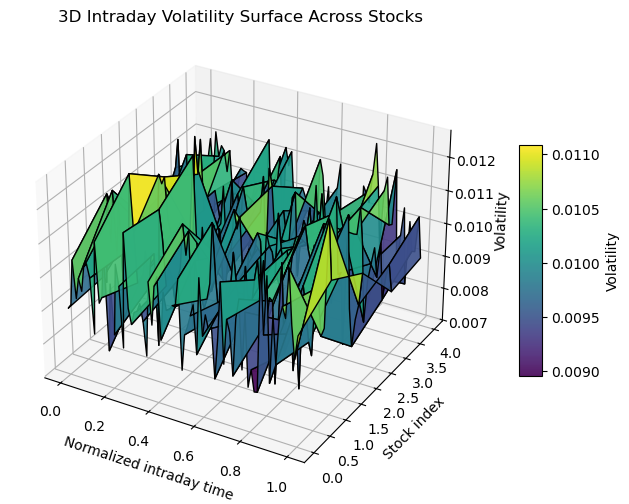

In [177]:
# Assume vol_surface is already computed: shape (n_stocks, n_intraday)
n_stocks, n_intraday = vol_surface.shape

# Create meshgrid for plotting
X_grid, Y_grid = np.meshgrid(times, np.arange(n_stocks))

# 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X_grid, Y_grid, vol_surface, cmap='viridis', edgecolor='k', alpha=0.9)

# Labels
ax.set_xlabel('Normalized intraday time')
ax.set_ylabel('Stock index')
ax.set_zlabel('Volatility')
ax.set_title('3D Intraday Volatility Surface Across Stocks')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=10, label='Volatility')

plt.show()

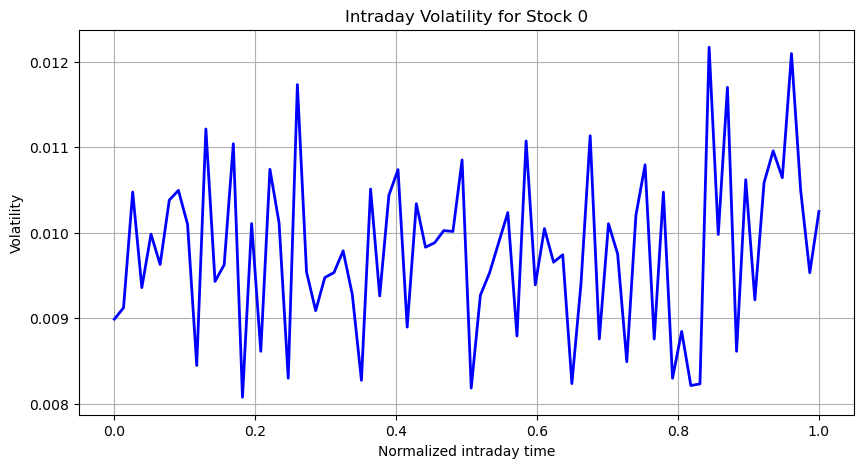

In [179]:
stock_index = 0  # choose the first stock
intraday_vol = returns[:, stock_index, :].std(axis=0)  # volatility across days

plt.figure(figsize=(10, 5))
plt.plot(times, intraday_vol, color='blue', linewidth=2)
plt.xlabel("Normalized intraday time")
plt.ylabel("Volatility")
plt.title(f"Intraday Volatility for Stock {stock_index}")
plt.grid(True)
plt.show()

## Pure BM

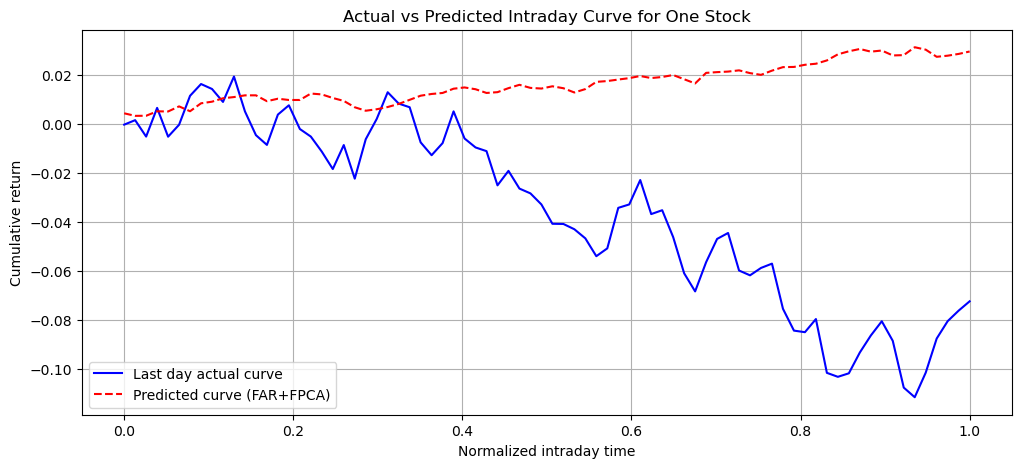

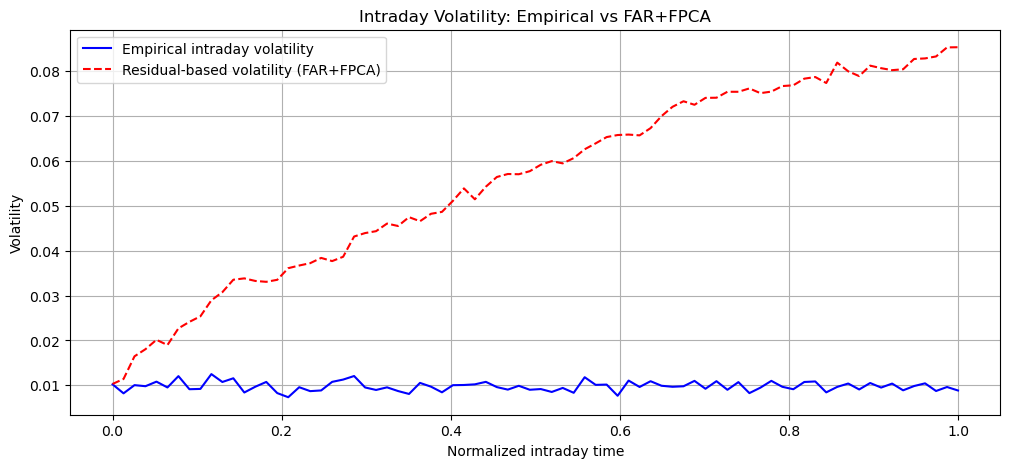

In [181]:
# ---------- 1. Simulate intraday returns ----------
np.random.seed(42)
n_days = 50
n_intraday = 78
times = np.linspace(0, 1, n_intraday)

# Simulate Brownian increments for one stock
returns = np.random.randn(n_days, n_intraday) * 0.01

# Compute cumulative returns to get functional curves
cum_returns = np.cumsum(returns, axis=1)

# ---------- 2. FPCA ----------
# Center curves
X_centered = cum_returns - cum_returns.mean(axis=0)
U, S, Vt = svd(X_centered, full_matrices=False)

# Keep first K eigenfunctions
K = 3
eigenfunctions = Vt[:K]
scores = X_centered @ Vt[:K].T  # project curves onto eigenfunctions

# ---------- 3. FAR(1) on FPCA scores ----------
scores_t = scores[1:]
scores_t_minus_1 = scores[:-1]
# Estimate FAR(1) coefficients via least squares
A = np.linalg.lstsq(scores_t_minus_1, scores_t, rcond=None)[0]

# Predict scores
scores_pred = scores_t_minus_1 @ A
# Reconstruct predicted curves
cum_returns_pred = scores_pred @ Vt[:K] + cum_returns.mean(axis=0)

# ---------- 4. Compute residuals and intraday volatility ----------
residuals = cum_returns[1:] - cum_returns_pred
intraday_vol_actual = returns.std(axis=0)
intraday_vol_residual = residuals.std(axis=0)

# ---------- 5. Plot results ----------
plt.figure(figsize=(12,5))
plt.plot(times, cum_returns[-1], label="Last day actual curve", color='blue')
plt.plot(times, cum_returns_pred[-1], label="Predicted curve (FAR+FPCA)", color='red', linestyle='--')
plt.xlabel("Normalized intraday time")
plt.ylabel("Cumulative return")
plt.title("Actual vs Predicted Intraday Curve for One Stock")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(times, intraday_vol_actual, label="Empirical intraday volatility", color='blue')
plt.plot(times, intraday_vol_residual, label="Residual-based volatility (FAR+FPCA)", color='red', linestyle='--')
plt.xlabel("Normalized intraday time")
plt.ylabel("Volatility")
plt.title("Intraday Volatility: Empirical vs FAR+FPCA")
plt.legend()
plt.grid(True)
plt.show()

## OU Process

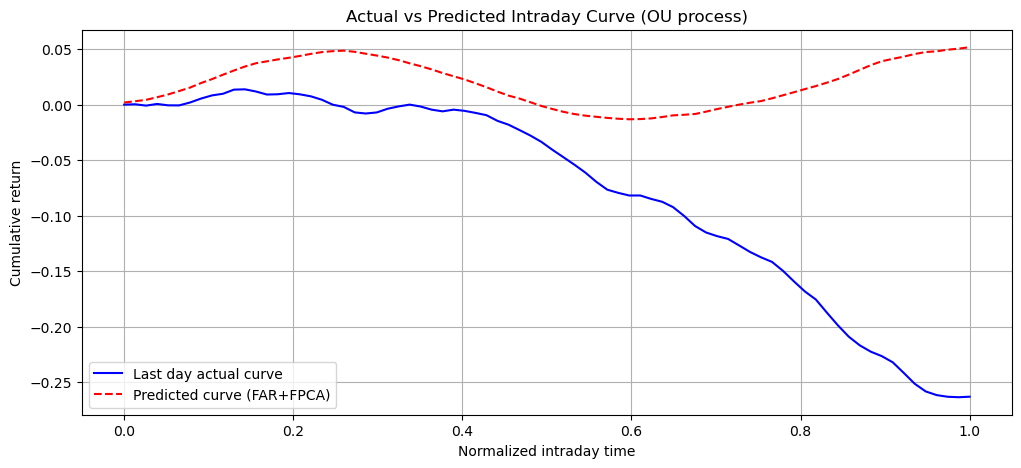

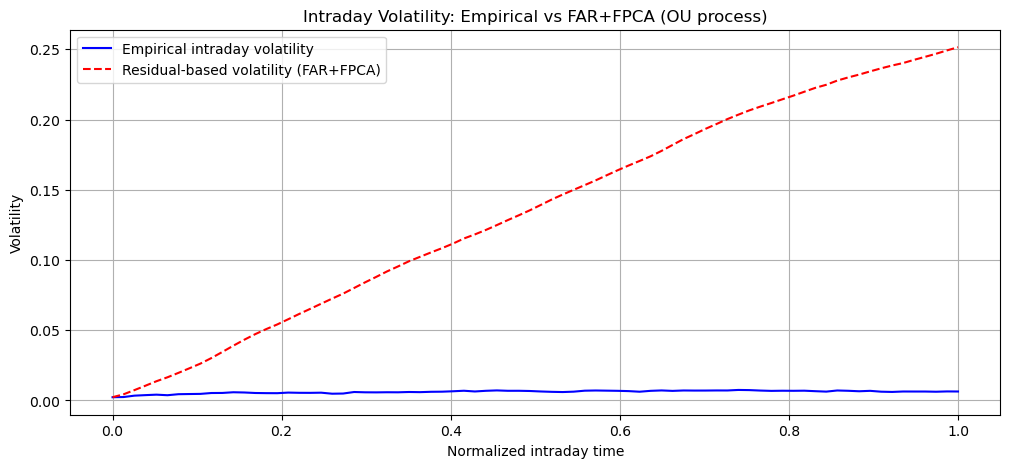

In [191]:
# ---------- 1. Simulate intraday OU returns ----------
np.random.seed(42)
n_days = 50
n_intraday = 78
times = np.linspace(0, 1, n_intraday)

# OU parameters
theta = 5.0    # speed of mean reversion
mu = 0.0       # long-term mean
sigma = 0.02  # volatility

# dt
dt = 1 / n_intraday

# Simulate OU process for one stock over multiple days
returns = np.zeros((n_days, n_intraday))
for d in range(n_days):
    x = 0.0  # start at mean
    for t in range(n_intraday):
        x = x + theta*(mu - x)*dt + sigma*np.sqrt(dt)*np.random.randn()
        returns[d, t] = x

# Compute cumulative returns (functional curves)
cum_returns = np.cumsum(returns, axis=1)

# ---------- 2. FPCA ----------
X_centered = cum_returns - cum_returns.mean(axis=0)
U, S, Vt = svd(X_centered, full_matrices=False)
K = 5
eigenfunctions = Vt[:K]
scores = X_centered @ Vt[:K].T

# ---------- 3. FAR(1) on FPCA scores ----------
scores_t = scores[1:]
scores_t_minus_1 = scores[:-1]
A = np.linalg.lstsq(scores_t_minus_1, scores_t, rcond=None)[0]

# Predict scores
scores_pred = scores_t_minus_1 @ A
cum_returns_pred = scores_pred @ Vt[:K] + cum_returns.mean(axis=0)

# ---------- 4. Compute residuals and volatility ----------
residuals = cum_returns[1:] - cum_returns_pred
intraday_vol_actual = returns.std(axis=0)
intraday_vol_residual = residuals.std(axis=0)

# ---------- 5. Plot results ----------
plt.figure(figsize=(12,5))
plt.plot(times, cum_returns[-1], label="Last day actual curve", color='blue')
plt.plot(times, cum_returns_pred[-1], label="Predicted curve (FAR+FPCA)", color='red', linestyle='--')
plt.xlabel("Normalized intraday time")
plt.ylabel("Cumulative return")
plt.title("Actual vs Predicted Intraday Curve (OU process)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(times, intraday_vol_actual, label="Empirical intraday volatility", color='blue')
plt.plot(times, intraday_vol_residual, label="Residual-based volatility (FAR+FPCA)", color='red', linestyle='--')
plt.xlabel("Normalized intraday time")
plt.ylabel("Volatility")
plt.title("Intraday Volatility: Empirical vs FAR+FPCA (OU process)")
plt.legend()
plt.grid(True)
plt.show()

Works very bad on this kind of process actually. Seems like the system is unable to learn a pattern. 